In [21]:
import pandas as pd

file_path = r"C:\Users\Dell\OneDrive\Desktop\Python_projects\job_offers.csv"

# Read the CSV file
job_data = pd.read_csv(file_path)

print(job_data.head()) 
print(job_data.info())  


                  Company                               Job Title  \
0                 Keyloop                     Junior Data Analyst   
1  dotSolved Systems Inc.                  Marketing Data Analyst   
2                 Snaplii  Data Analyst - Informatics and Systems   
3              Ratehub.ca                            Data Analyst   
4    Recruiting in Motion                   Data Analyst (Remote)   

          Location       Post Date Workplace Type   Job Type     Position Type  
0           Canada      1 week ago         Remote  Full-time         Associate  
1           Canada  18 minutes ago         Remote        NaN  Mid-Senior Level  
2  Mississauga, ON    3 months ago        On-site  Full-time       Entry Level  
3      Toronto, ON      4 days ago         Remote  Full-time  Mid-Senior Level  
4   North York, ON     2 weeks ago         Remote  Full-time  Mid-Senior Level  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 colum

In [22]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Data Cleaning
# Check for missing values
print("Missing values before cleaning:")
print(job_data.isnull().sum())

# Fill missing values or drop rows as necessary
job_data.fillna({'Workplace Type': 'Not Specified', 'Job Type': 'Not Specified', 'Position Type': 'Not Specified'}, inplace=True)

print("\nMissing values after cleaning:")
print(job_data.isnull().sum())


Missing values before cleaning:
Company             0
Job Title           0
Location            0
Post Date           0
Workplace Type     64
Job Type          132
Position Type     127
dtype: int64

Missing values after cleaning:
Company           0
Job Title         0
Location          0
Post Date         0
Workplace Type    0
Job Type          0
Position Type     0
dtype: int64


In [23]:
# Remove duplicate rows
job_data.drop_duplicates(inplace=True)


In [24]:
# Check unique values in categorical columns
print(job_data['Workplace Type'].unique())
print(job_data['Job Type'].unique())
print(job_data['Position Type'].unique())


['Remote' 'On-site' 'Not Specified' 'Hybrid']
['Full-time' 'Not Specified' 'Part-time']
['Associate' 'Mid-Senior Level' 'Entry Level' 'Not Specified']


In [25]:
import pandas as pd
from datetime import datetime, timedelta
import re

# Specify the file path for your CSV file
file_path = r"C:\Users\Dell\OneDrive\Desktop\Python_projects\job_offers.csv"

# Read the CSV file
job_data = pd.read_csv(file_path)

# Function to parse relative dates to absolute dates
def parse_relative_date(date_str):
    current_date = datetime.now()
    
    # Remove "Reposted" prefix and strip any extra spaces
    date_str = re.sub(r"Reposted", "", date_str).strip()
    
    # Convert relative terms to timedelta
    match = re.match(r"(\d+)\s(\w+)", date_str)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        if "minute" in unit:
            return current_date - timedelta(minutes=num)
        elif "hour" in unit:
            return current_date - timedelta(hours=num)
        elif "day" in unit:
            return current_date - timedelta(days=num)
        elif "week" in unit:
            return current_date - timedelta(weeks=num)
        elif "month" in unit:
            return current_date - timedelta(days=num * 30)  # Approximation
        elif "year" in unit:
            return current_date - timedelta(days=num * 365)  # Approximation
    return None

# Apply the function to convert relative dates to datetime format
job_data['Post Date Cleaned'] = job_data['Post Date'].apply(parse_relative_date)

# Convert the column to datetime type if needed
job_data['Post Date Cleaned'] = pd.to_datetime(job_data['Post Date Cleaned'])

# Display the cleaned DataFrame with original and cleaned dates
print(job_data[['Post Date', 'Post Date Cleaned']])


          Post Date          Post Date Cleaned
0        1 week ago 2024-11-02 14:19:19.109868
1    18 minutes ago 2024-11-09 14:01:19.109901
2      3 months ago 2024-08-11 14:19:19.109910
3        4 days ago 2024-11-05 14:19:19.109916
4       2 weeks ago 2024-10-26 14:19:19.109920
..              ...                        ...
796    4 months ago 2024-07-12 14:19:19.115002
797      1 year ago 2023-11-10 14:19:19.115010
798      1 week ago 2024-11-02 14:19:19.115018
799      1 week ago 2024-11-02 14:19:19.115026
800    4 months ago 2024-07-12 14:19:19.115035

[801 rows x 2 columns]


In [26]:
import pandas as pd

# Assuming 'job_data' is your cleaned DataFrame
cleaned_file_path = r"C:\Users\Dell\OneDrive\Desktop\Python_projects\final_data.csv"

# Save the cleaned DataFrame to a new CSV file named 'final_data.csv'
job_data.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to", cleaned_file_path)


Cleaned data saved to C:\Users\Dell\OneDrive\Desktop\Python_projects\final_data.csv


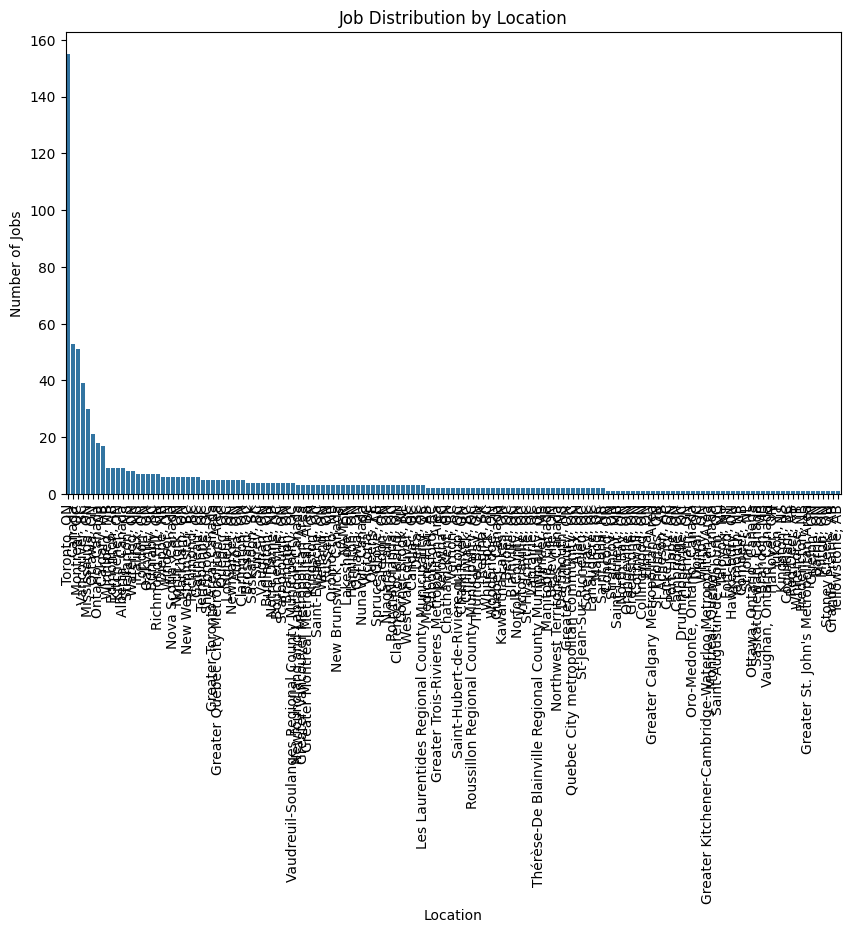

In [27]:
# Job distribution by location
location_counts = job_data['Location'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=90)
plt.title("Job Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\3152052071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")


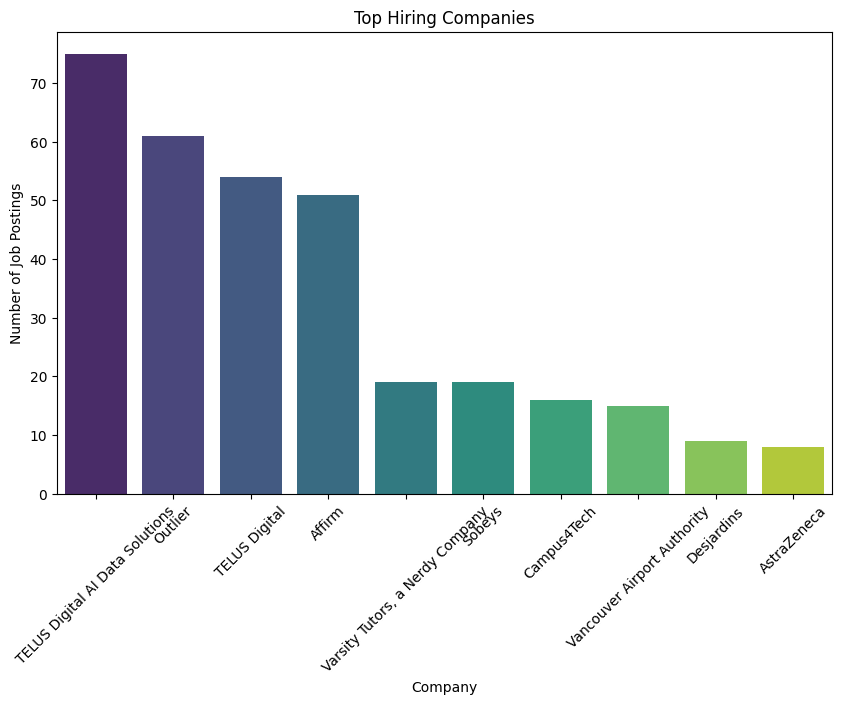

In [28]:
# Top hiring companies
top_companies = job_data['Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top Hiring Companies")
plt.xlabel("Company")
plt.ylabel("Number of Job Postings")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\3290606468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='viridis')


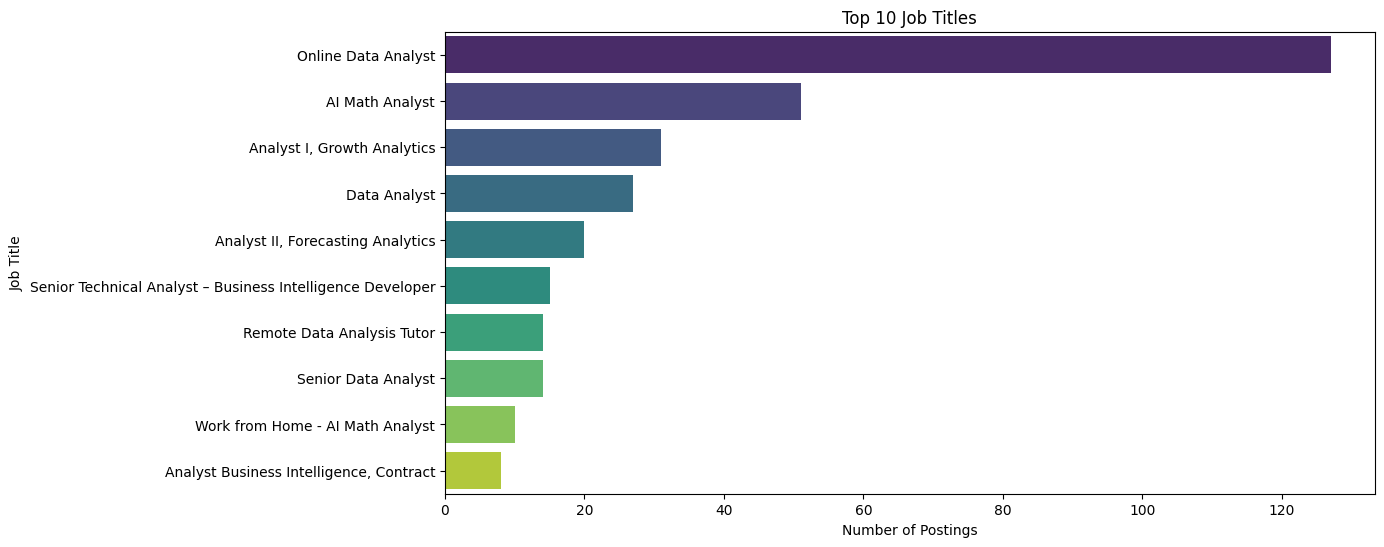

In [29]:
# Job Title Distribution
plt.figure(figsize=(12, 6))
job_title_counts = job_data['Job Title'].value_counts().head(10)  # Top 10 job titles
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\4081439054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Workplace Type', data=job_data, palette='muted')


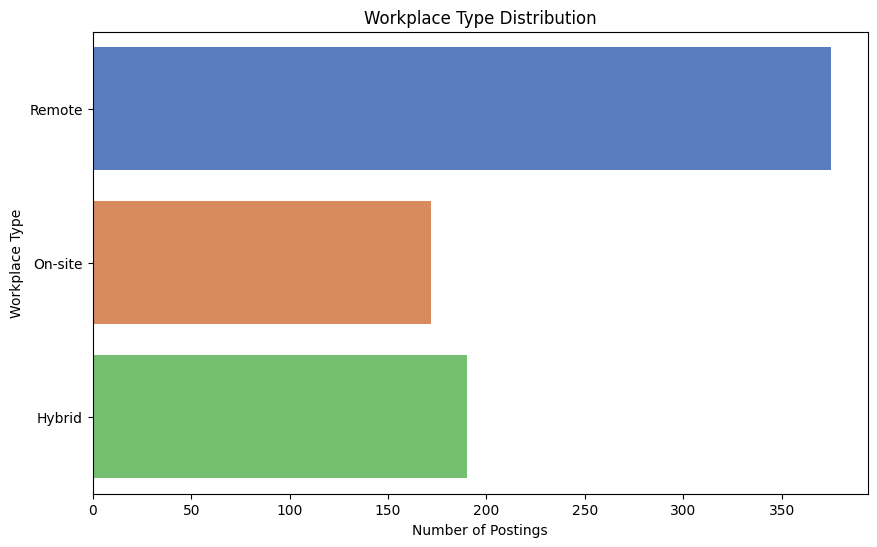

In [30]:
# Workplace Type Distribution
plt.figure(figsize=(10, 6))
workplace_counts = job_data['Workplace Type'].value_counts()
sns.countplot(y='Workplace Type', data=job_data, palette='muted')
plt.title('Workplace Type Distribution')
plt.xlabel('Number of Postings')
plt.ylabel('Workplace Type')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14448\514761017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Position Type', data=job_data, palette='crest')


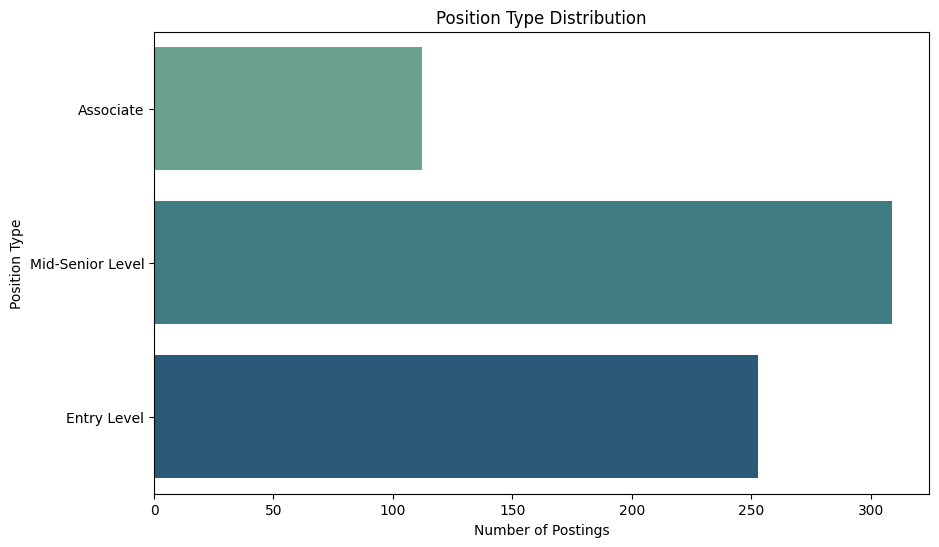

In [31]:
# Position Type Distribution
plt.figure(figsize=(10, 6))
position_counts = job_data['Position Type'].value_counts()
sns.countplot(y='Position Type', data=job_data, palette='crest')
plt.title('Position Type Distribution')
plt.xlabel('Number of Postings')
plt.ylabel('Position Type')
plt.show()